In [1]:
#Import the libraries
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Get the stock starting date
Stock_Start_Date = "2011-06-30"

In [3]:
# Get the stock ending date
today = datetime.today().strftime("%Y-%m-%d")
today

'2020-02-23'

In [4]:
#Get the Stock Price from starting date to ending date
df = web.DataReader('MSFT', data_source='yahoo', start=Stock_Start_Date, end=today) #format = 'YYYY-MM-DD'
#df

In [5]:
#Show the number of rows and columns in the data
df.shape

(2175, 6)

/Users/guorong/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


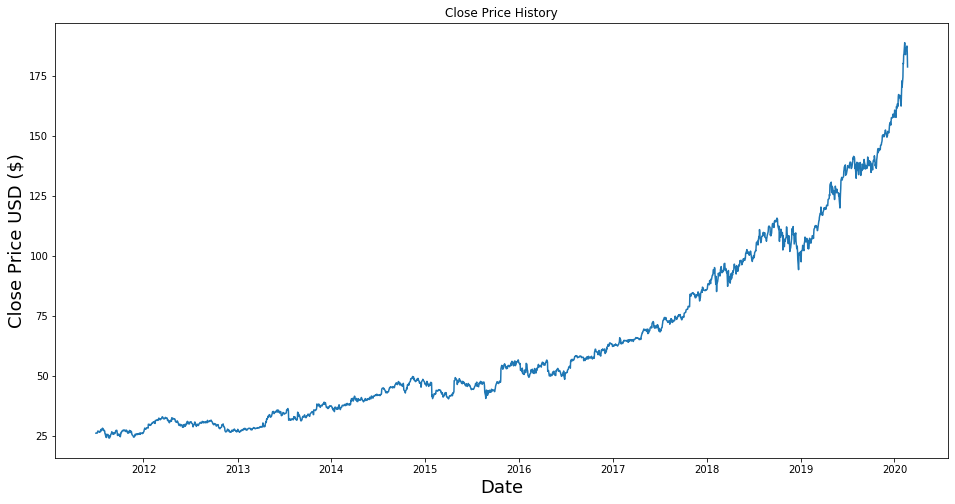

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#data

In [8]:
#Converting the dataframe to a numpy array
dataset = data.values
#dataset

In [9]:
#Get the number of rows to train the model
training_data_len = math.ceil( len(dataset) *.8) 
# len(dataset) *.8: to get 80% of the original data, math.ceil: to rounded up
training_data_len

1740

In [10]:
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset) 
#scaled_data

In [11]:
#Create the training data set
train_data = scaled_data[0:training_data_len, : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # days from 0 to 59
    y_train.append(train_data[i,0])      # days on 60
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.01226324, 0.01238466, 0.01244537, 0.01426664, 0.01693784,
       0.01784847, 0.0160879 , 0.01554153, 0.0160879 , 0.01511656,
       0.01699855, 0.01584507, 0.02161244, 0.0186984 , 0.01894124,
       0.02155173, 0.02385867, 0.02489073, 0.02033755, 0.0227052 ,
       0.02076251, 0.01997329, 0.01711996, 0.01784847, 0.01189899,
       0.01032055, 0.00303545, 0.00971346, 0.00133561, 0.00734581,
       0.00679942, 0.00928849, 0.00831715, 0.00771006, 0.00418893,
       0.00042496, 0.        , 0.00449247, 0.00558524, 0.00358184,
       0.00771006, 0.01129189, 0.01365954, 0.01590578, 0.01353812,
       0.01104905, 0.00928849, 0.01226324, 0.01359883, 0.0106848 ,
       0.01159543, 0.01250608, 0.01529869, 0.01827344, 0.01906266,
       0.01960903, 0.01821272, 0.01220253, 0.00655658, 0.00655658])]
[0.00886353214432517]


In [12]:
#Convert x_train and y_train to numpy arrays so we can use them for training the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#x_train

In [14]:
#y_train

In [15]:
x_train.size

100800

In [16]:
y_train.size

1680

In [17]:
#Reshape the data because LSTM accpet 3 dimentional data as input
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1680, 60, 1)

In [18]:
#Build the LSTM network model
model = Sequential()
#First LSTM layer, input_shape = the number of time steps (60 or x_train.shape[1]) while the last parameter is the number of features (1)
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) #Units=number of neurons, return_sequences is set to true since we will add more layers to the model.
model.add(LSTM(units=50, return_sequences=False)) #LSTM layer with 50 neurons, return sequence by default is False but I put it here just to show
model.add(Dense(units=25)) #Just your regular densely-connected Neural Network layer with 25 neurons
model.add(Dense(units=1)) #Just your regular densely-connected Neural Network layer with 1 neuron

In [19]:
#Compile the model
# optimizer = adam and the optimizer is used to improve upon the loss
# loss function = mean_squared_error (MSE) and loss functions are used to measure how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Train the model
#Batch Size: Total number of training examples present in a single batch
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network .
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0039
Epoch 2/100
1680/1680 [==============================] - 1s 882us/step - loss: 1.3969e-04
Epoch 3/100
1680/1680 [==============================] - 1s 848us/step - loss: 7.9505e-05
Epoch 4/100
1680/1680 [==============================] - 1s 841us/step - loss: 7.6553e-05
Epoch 5/100
1680/1680 [==============================] - 1s 842us/step - loss: 8.1096e-05
Epoch 6/100
1680/1680 [==============================] - 1s 853us/step - loss: 7.9734e-05
Epoch 7/100
1680/1680 [==============================] - 1s 845us/step - loss: 7.9295e-05
Epoch 8/100
1680/1680 [==============================] - 1s 892us/step - loss: 7.9682e-05
Epoch 9/100
1680/1680 [==============================] - 2s 908us/step - loss: 7.7338e-05
Epoch 10/100
1680/1680 [==============================] - 2s 913us/step - loss: 7.4601e-05
Epoch 11/100
1680/1680 [==============================] - 2s 950us/step - loss: 7.3827e-05
Epoch 12/100
1

1680/1680 [==============================] - 2s 964us/step - loss: 2.9378e-05
Epoch 93/100
1680/1680 [==============================] - 2s 952us/step - loss: 3.1501e-05
Epoch 94/100
1680/1680 [==============================] - 2s 940us/step - loss: 3.8800e-05
Epoch 95/100
1680/1680 [==============================] - 2s 920us/step - loss: 3.1772e-05
Epoch 96/100
1680/1680 [==============================] - 2s 923us/step - loss: 2.8704e-05
Epoch 97/100
1680/1680 [==============================] - 2s 915us/step - loss: 3.3385e-05
Epoch 98/100
1680/1680 [==============================] - 2s 897us/step - loss: 3.3019e-05
Epoch 99/100
1680/1680 [==============================] - 2s 895us/step - loss: 3.3793e-05
Epoch 100/100
1680/1680 [==============================] - 2s 896us/step - loss: 2.7297e-05


In [21]:
#Create the testing data set
#Create the scaled testing data set : a new array containing the scaled values from index 1572 to 2039 of the dataframe, for a total length of 460, using the past 60 days
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])#The independent testing variables or testing feature set 'X' (holds the stock price value for the past 60 days at position 'i-60')

In [22]:
#Convert x_test to a numpy array so we can use it to test and make predictions using the LSTM model we created
x_test = np.array(x_test)

In [23]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) #Reshaping the variable to be 3-Dimensional in the form [samples, time steps, features] for the Neural Network

In [24]:
#Getting the models predicted price values
predictions = model.predict(x_test) #Getting the models predicted price values
predictions = scaler.inverse_transform(predictions) #Undo the scaling
#predictions

In [25]:
#Get the root mean squared error (rmse)
rmse=np.sqrt(np.mean((predictions- y_test)**2))
rmse

2.031689893568476

In [26]:
train = data[:training_data_len] # A dataframe to get rows from index 0 to 1632 (1633 rows total)
train.head()

,Close
Date,
2011-06-30,26.000000
2011-07-01,26.020000
2011-07-05,26.030001
2011-07-06,26.330000
2011-07-07,26.770000


In [27]:
valid = data[training_data_len:] # A dataframe to get rows from index 1633 to the end of the list 
valid.head()

,Close
Date,
2018-05-31,98.839996
2018-06-01,100.790001
2018-06-04,101.669998
2018-06-05,102.190002
2018-06-06,102.489998


In [28]:
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
valid.tail()

/Users/guorong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,Predictions
Date,,
2020-02-14,185.350006,180.627945
2020-02-18,187.229996,181.218353
2020-02-19,187.279999,183.140884
2020-02-20,184.419998,184.486893
2020-02-21,178.589996,183.410843


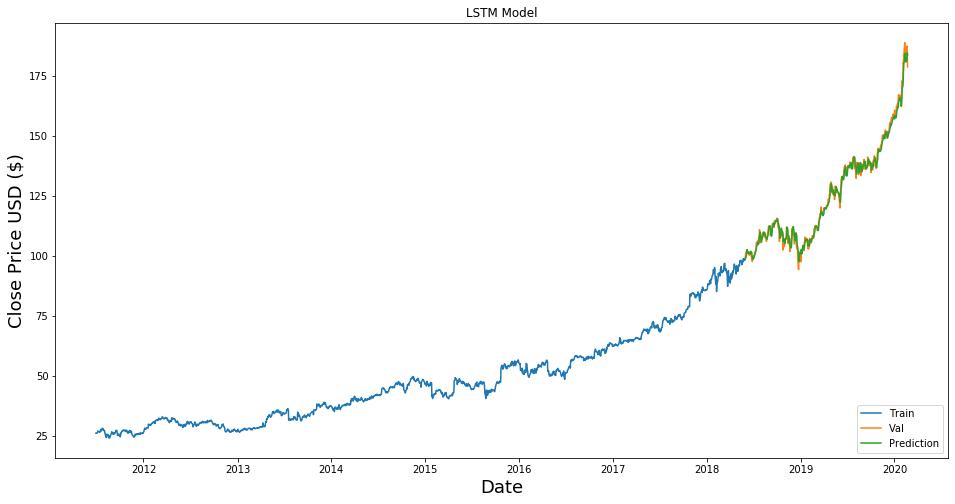

In [29]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

In [30]:
#Get the quote from '2012-01-01' to '2020-02-10' to predict the closing price for '2020-02-11'
company_stock_quote = web.DataReader('MSFT', data_source='yahoo', start=Stock_Start_Date, end=today) 

#Create a new dataframe with only the 'Close' column
new_df = company_stock_quote.filter(['Close']) 
#Get the last 60 rows of data from the stock/ aka get the past 60 days of the stock and convert it to an array and store it in a variable
last_60_days = new_df[-60:].values 

#Transform the data to values between 0 and 1
last_60_days_scaled  = scaler.transform(last_60_days) 

#Create an empty list
X_test = [] 
#Append the data (the past 60 values to predict the 61st value)
X_test.append(last_60_days_scaled) 
#Convert X_test to a numpy array so we can use it to test and make predictions using the LSTM model we created
X_test = np.array(X_test) 
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

#Get the predicted scaled price
pred_price = model.predict(X_test) 
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price) 
print(pred_price)#Print the predicted price



[[179.13]]
